<p><font size="8" color='grey'> <b>
Anwendung Generativer KI
</b></font> </br></p>

<p><font size="6" color='grey'> <b>
Codieren mit GenAI
</b></font> </br></p>

---

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  Colab-Umfeld</font> </br></p>
# Installierte Python Version
import sys
print(f"Python Version: ",sys.version)
# Installierte LangChain Bibliotheken
print()
print("Installierte LangChain Bibliotheken:")
!pip list | grep '^langchain'
# Unterdrückt die "DeprecationWarning" von LangChain für die Memory-Funktionden
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="langsmith.client")

Python Version:  3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]

Installierte LangChain Bibliotheken:
langchain                          0.3.19
langchain-core                     0.3.40
langchain-text-splitters           0.3.6


In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  SetUp API-Keys (setup_api_keys)</font> </br></p>

def setup_api_keys():
    """Konfiguriert alle benötigten API-Keys aus Google Colab userdata"""
    from google.colab import userdata
    import os
    from os import environ

    # Dictionary der benötigten API-Keys
    keys = {
        'OPENAI_API_KEY': 'OPENAI_API_KEY',
        'SERPAPI_API_KEY': 'SERPAPI_API_KEY',
        'WEATHER_API_KEY': 'WEATHER_API_KEY',
        'HF_TOKEN': 'HF_TOKEN',
        'GOOGLE_API_KEY': 'GOOGLE_API_KEY',
        # Weitere Keys bei Bedarf
    }

    # Keys in Umgebungsvariablen setzen
    for env_var, key_name in keys.items():
        environ[env_var] = userdata.get(key_name)

    return {k: environ[k] for k in keys.keys()}

# Verwendung
all_keys = setup_api_keys()
# Bei Bedarf einzelne Keys direkt zugreifen
WEATHER_API_KEY = all_keys['WEATHER_API_KEY']

# **1 <font color='orange'>|</font> Codieren**
---

LLMs sind Experten im Generieren von Code und können die Produktivität von Programmierern erheblich steigern. In diesem Kurs kann man ```Gemini``` oder Programme mit `OpenAI-API` für die Aufgaben  verwenden. Man kann dieselben OpenAI-LLMs für Codegenerierung verwenden, auf die main OpenAI Zugriff für andere Aufgaben nimmt.

<p><font color='blue' size="4">
Teilnehmer:innen des Kurses sind ausdrücklich eingeladen, generative KI in allen Bereichen des Kurses einzusetzen – insbesondere zur Codegenerierung und zur Unterstützung bei anspruchsvollen Aufgaben. Die Kunst, präzise und wirkungsvolle Prompts zu formulieren, spielt eine entscheidende Rolle im modernen Software-Engineering. Daher widmet sich ein eigenes Modul diesem Thema und vermittelt, wie man gezielt und effizient mit KI-Modellen interagiert. Es bietet die Möglichkeit, das Wissen im Prompt-Engineering zu vertiefen und das Potenzial generativer KI optimal zu nutzen.
</font></p>




Das Code-Beispiel für die Verwendung von `OpenAI-APIs` zur Codegenerierung (Lösung mit OpenAI-API) ist ausgeblendet.

<p><font color='black' size="5">
Kontext geben
</font></p>

`Gemini`

> Du bist Experte in der Erstellung von Python-Code für Aufgaben im Bereich `Generativer KI` und unterstützen mich bei der Code-Generierung. Der Code sollte gut strukturiert und möglichst einfach sein. Die wesentliche Code-Blocke werden kommentiert. Es wird dabei immer die neueste Version der benutzen Bibliotheken, wie z.B. LangChain v0.3+ oder neuer, verwendet. Die verwendeten APIs sollten nicht `deprecated` sein.







In [ ]:
#@title
#@markdown   <p><font size="4" color='blue'>  Codieren OpenAI-API</font> </br></p>

# ---------- Installation

!uv pip install --system -q langchain_openai

# ---------- API-Key setzen

from os import environ
from google.colab import userdata
environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

# ---------- Importe

from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
)
from langchain_openai import ChatOpenAI
from IPython.display import display, Markdown

# ---------- Konstante

MODEL = 'gpt-4o-mini'

# ---------- Funktion für Chat

def help_coding(prompt):
    messages = [
        SystemMessage(
            content="Du bist Experte in der Erstellung von Python-Code für Aufgaben im Bereich Generativer KI und unterstützen mich bei der Code-Generierung. Du beantwortest Fragen informativ und einfach."
        ),
        HumanMessage(content=prompt),
    ]

    # Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
    llm = ChatOpenAI(
    model=MODEL,
    temperature= 0.0,
    n= 1)

    print(MODEL)
    print("Modellausgabe:")
    output = llm.invoke(messages)
    display(Markdown(output.content))

<p><font color='black' size="5">
Einfache Aufgabe
</font></p>

Nachdem der Kontext definiert wurde, kann man nun Code generieren. Der folgende Prompt generiert eine Python-Funktion zum Erstellen einer Fibonacci-Folge.

`Gemini`



> Schreibe Python-Code, um eine Fibonacci-Folge mit einer durch den Parameter l angegebenen Länge zurückzugeben




In [ ]:
#@title
#@markdown   <p><font size="4" color='blue'>  Aufruf OpenAI-API</font> </br></p>
help_coding("""
... Prompt ...
""")

<p><font color='black' size="5">
Komplexere Aufgabe - Einkommensteuer:
</font></p>

[Berechnung](https://www.finanz-tools.de/einkommensteuer/berechnung-formeln/2025)

`Gemini`

> Schreibe eine Python-Funktion namens `einkommensteuer`, die diese Parameter akzeptiert.
+ zve: zu versteuerndes Einkommen p.a.
+ tarif: Grundtarif oder Splitting.
Unterscheide Fälle mit nach den gesetz­lich fest­gelegten Formeln.

> Die Funktion sollte eine Liste zurückgeben, die folgende Angaben enthält:
+ steuersatz: Steuersatz
+ steuer: Einkommensteuer p.a.
+ soli: Solidaritätszuschlag p.a.

<p><font color='black' size="5">
Komplexere Aufgabe: Neuronales Netz
</font></p>



`Gemini`

> **Augabe**: Erstellung eines neuronalen Netzwerks mit Keras zur Klassifikation der Iris-Arten   
**Ziel**: Entwickle und trainiere ein neuronales Netzwerk unter Verwendung der Keras-Bibliothek und des Iris-Datensatzes von sklearn, um die Arten der Iris-Blumen basierend auf ihren Merkmalen zu klassifizieren.   
**Daten**: Verwende den Iris-Datensatz, der über die sklearn.datasets verfügbar ist. Dieser Datensatz enthält 150 Instanzen von Iris-Blumen, unterteilt in drei Arten, sowie vier Merkmale: Sepallänge, Sepalbreite, Petallänge und Petalbreite.

# **2 <font color='orange'>|</font> Revision**
---


Im nächsten Schritt wird mit dem LLM ein Dialog geführt, um Änderungen am ausgegebenen Code anzufordern und ein besseres Modell zu erstellen.



Es ist sinnvoll, sich ein Prompt-Template zu erstellen, dass bei vergleichbaren Aufgabenstellungen wieder verwendt werden kann.

`Gemini`



> **Template**: <br> Prüfe und optimiere den beigefügten Code. Wenn Du Kommentare zum Code hast, stelle sie vor den Code. Alle Hinweise zur Ausführung sollten dem Code folgen. Verwende Doc-Strings für eine Kurz-Dokumentation. Sortieren die erforderlichen Importe nach Bibliotheken und befolge die PEP-8-Formatierung. Wenn Informationen fehlen, frage nach. Mache Vorschläge, für mögliche Verbesserungen des generierten Codes.  <br>    
`Code`




<p><font color='black' size="5">
Ändern des Codes
</font></p>

Das Ergebnis kann durch das LLM verändert bzw. optimiwert werden. Die erfolgt über zusätzliche Eingabeaufforderung.

Gemini



> Bitte erstelle eine farbige Confusion-Matrix mit den Ergebnissen der Klassifizierung.



<p><font color='black' size="5">
Testen des Codes
</font></p>

Der generierte Code muss getestet werden. Da auch bei der Erstellung durch ein LLM das Ergebnis unvollständig, fehlerhaft oder nicht mehr aktuell sein kann.

Bei Verwendung von `Gemini` innerhalb von Google Colab kann dies direkt im Notebook erfolgen. Andere ChatBots bieten die Möglichkeit Code direkt auszuführen (z.B. `ChatGPT` Canvas oder `Claude` Artifacts). Ist dies nicht möglich muss der erstellte Code in die Entwicklunsgumgebung zur Ausführung kopiert werden.

Fehlermeldung sind dem LLM mitzuteilen. Das LLM wird mit einer Erläuterung der Fehlermeldung, Lösungsvorschlägen und ggf. einem korrigierten Code reagieren.

<p><font color='black' size="5">
Konsolidierung der Konversation in einem Prompt
</font></p>

Man kann die gesamte Konversation in einem einzigen Prompt zusammenfassen, insbesondere wenn man den Prompt zusammen mit dem Code speichern möchte oder eine `optimierte` Version eines Templates für kommende Aufgaben erstellt werden soll. Bei Bedarf bitte *Nachbesserung* des Prompts anfordern.

`Gemini`

> Bitte aus dem Chatverlauf eine konsolidierte ud optimierte Version des Prompts erstellen.



# **3 <font color='orange'>|</font> Debugging**
---

LLMs können beim Debuggen von *eigenem* oder *fremdem* Code helfen.  

*Es kann das Template bzw. der Code von 2. verwendet werden.*

`Gemini`

> Ich versuche, den folgenden Code zu debuggen: <br>
... Code hier angeben ... <br>
Ich erhalte jedoch die folgende Fehlermeldung:<br>
... Fehler hier angeben ...

**Hinweis**:

Bei Ausführung des fehlerhaften Codes in Google Colab wird unterhalb der Fehlermeldung eine Schaltfläche angezeigt, die zum Debuggen verwendet werden kann. Nachfolgend kann dann der korrigierte Code übernommen werden.



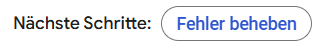

<p><font color='black' size="5">
Codeerklärung
</font></p>

LLMs sind gut darin, Code zu erklären.

`Gemini`

> Bitte erkläre mir den nachfolgende Code.<br>
... Code   ...

In [ ]:
#
# Codebeispiel
#
def funktion(text, verschiebung):
    v_text = ""
    for char in text:
        index = ord(char) + verschiebung
        v_text += chr(index)
    return v_text

text = input("Text: ")
verschiebung = int(input("Verschiebung (ganze Zahl): "))
funktion(text, verschiebung)

<p><font color='black' size="5">
Code optimieren
</font></p>

LLM können sehr gut eingesetzt werden, um Code zu verbessern. Sie können spezifische Verbesserungen nennen, die geünscht werden, wie z. B. das Entfernen nicht verwendeter oder redundanter Importe, das Einfügen von Kommentaren oder doc-strings, das Sortieren der Importe und die Einhaltung von PEP-8 für die Codeformatierung.

`Gemini`

> Bitte Verbesserungen für den nachfolgenden Code vorschlagen. Achte auf Modularisierung und die Einhaltung von PEP-8 für die Codeformatierung.  <br>
... Code ...



# **4 <font color='orange'>|</font> Prozessintegration**
---

Für komplexere Aufgaben ist es notwendig über mehrere Schritte einen LLM-Support zu erhalten. Es werden Prompts erstell, die nicht-triviale Aufagben unterstützen. Für einzelne Code-Segmente ist es sinnvoll die *generierenden Prompst* zum Code abzuspeichern, um später darauf zugreifen zu können. Die erfolgt bei `Gemini` ohne Aufforderung zu Beginn des Codeblocks.



Prompting wird zweifellos ein wesentlicher Bestandteil der modernen Softwareentwicklung werden. Programmierer werden wahrscheinlich individuelle Prompts erstellen, um Methoden zu generieren. In diesem Teil werden wir sehen, wie man einen Prompt schreibt, der konsistent eine nicht-triviale Bildzuschneidefunktion erzeugt. Wir werden den Prompt auch mit der Funktion speichern, damit wir ihn in Zukunft nicht verlieren. Darüber hinaus werden wir automatisierte Unit-Tests verwenden, um sicherzustellen, dass die generierte Methode anfangs das tut, was wir erwarten, und dies auch in Zukunft tut, selbst wenn die Technik neu generiert wird.

<p><font color='black' size="5">
Prompt zur Codegenerierung
</font></p>




Der folgende Code zeigt die Eingabeaufforderung, die ich zum Generieren der Clipping-Funktion erstellt habe. Es ist wichtig, sehr klar anzugeben, was Sie vom LLM erwarten. In diesem Fall habe ich Folgendes angegeben:

* Der Name der Funktion
* Der Name aller Argumente dieser Funktion
* Was zurückzugeben ist
* Der genaue Algorithmus, einschließlich der Handhabung negativer Werte


`Gemini`






> **Aufgabenbeschreibung:**   
Schreibe eine Python-Funktion namens `rotate` unter Beachtung des PEP-8-Styleguides. Diese Funktion soll ein Bild (im OpenCV-Format) um einen bestimmten Winkel rotieren und dabei sicherstellen, dass das gesamte rotierte Bild vollständig dargestellt wird. Fehlende Bereiche, die durch die Rotation entstehen, sollen mit einer angegebenen Hintergrundfarbe gefüllt werden.   
**Aufgabenanforderungen im Detail:**
1. **Parameter:**
   - `cv2_image`: Das Eingangsbild (z. B. als NumPy-Array).
   - `angle`: Der Rotationswinkel in Grad (float).
   - `center` (optional): Ein Tupel `(x, y)`, das den Rotationsmittelpunkt definiert. Falls `None` übergeben wird, soll der Mittelpunkt des Bildes verwendet werden.
   - `background`: Eine Farbe (z. B. als Tupel in BGR), mit der die neu entstehenden Bereiche aufgefüllt werden.
2. **Funktionalität:**
   - **Berechnung der neuen Bilddimensionen:** Bestimme, wie groß das Ergebnisbild sein muss, um das gesamte rotierte Originalbild aufzunehmen.
   - **Bildrotation:** Rotieren Sie das Bild um den angegebenen Winkel. Dabei muss der Rotationsmittelpunkt beachtet werden.
   - **Erstellung eines neuen Bildes:** Erzeuge ein neues Bild der berechneten Größe, das komplett mit der Hintergrundfarbe gefüllt ist.
   - **Einfügen des rotierten Bildes:** Füge das rotierte Bild in das neu erstellte Bild ein. Dabei ist darauf zu achten, dass die relative Position (Verschiebung des Rotationszentrums im Vergleich zum Originalbild) korrekt übernommen wird.
3. **Code-Qualität:**
   - Alle Importe sollen alphabetisch sortiert werden.
   - Der Code soll ausführliche Kommentare enthalten.
   - Die Funktion muss einen Docstring besitzen, in dem:
     - Die Funktionalität im Detail erklärt wird.
     - Alle Parameter (inklusive Typangaben) beschrieben werden.
     - Der Rückgabewert dokumentiert wird. (Hinweis: Der Rückgabewert soll ein Tupel sein, das das neue Bild und die Verschiebungswerte des Rotationszentrums relativ zum Originalbild enthält.)
4. **Arbeitsprozess:**
   - **Schritt 1:** Entwerfe zunächst die Funktionssignatur und den ausführlichen Docstring.
   - **Schritt 2:** Implementiere die Berechnung der neuen Bilddimensionen basierend auf dem Rotationswinkel.
   - **Schritt 3:** Erstelle das neue Bild, das mit der Hintergrundfarbe gefüllt ist.
   - **Schritt 4:** Implementiere die Rotation und füge das rotierte Bild in das neue Bild ein.
   - **Schritt 5:** Füge alle Codebestandteile zusammen und teste die Funktionalität.



<p><font color='black' size="5">
Ausprobieren des Codes
</font></p>

<p><font color='black' size="5">
Weiterentwickeln des Codes
</font></p>

`Gemini`



> Bitte erweitere den Code: Das Bild soll monochrom (in Graustufen) dargestellt werden.



<p><font color='black' size="5">
Unit-Test
</font></p>

Unit-Tests sind ein wesentlicher Aspekt der Softwareentwicklung. Der folgende Prompt zeigt, man einen Unit-Test erstellen kann.

Gemini



> Erstelle einen Unit-Test für die Funktion rotate.



<p><font color='black' size="5">
Was wird im Unit-Test geprüft?
</font></p>


Gemini



>  Was wird im Unit-Test geprüft?



Der Unit-Test prüft die `rotate` Funktion mit drei verschiedenen Szenarien:

...



**Hinweis:**<br>

Die meisten Softwarearchitekten empfehlen, zum Generieren der Komponententests kein LLM zu verwenden, da Sie wissen müssen, was getestet wird.

# **5 <font color='orange'>|</font> Grenzen**
---

Während LLMs die Produktivität in der Softwareentwicklung deutlich steigern können, ist es ebenso wichtig, ihre Grenzen zu kennen, insbesondere bei der Codegenerierung. Die folgende Liste fasst mögliche Grenzen kurz und knapp zusammen.


**Analyse großer Datenmengen**
- LLMs haben kein eigenständiges Verständnis für neue Daten
- Speicher- und Verarbeitungsbeschränkungen durch begrenzte Kontextfenster
- Schwierigkeiten beim Umgang mit unstrukturierten Daten und unbekannter Datenqualität
- **Empfehlung**: Kombination von LLMs mit traditionellen Datenanalysetools und Vorverarbeitung

**Arbeiten an der Grenze des Verständnisses**
- Begrenzte Fähigkeit zur echten Innovation
- Kein tiefgehendes technisches Verständnis für komplexe Systeme
- Keine bzw. gering ausgeprägte Fähigkeit zur Selbstverbesserung des eigenen Codes
- **Empfehlung**: Mensch-KI-Kollaboration und iterative Entwicklung

**Iterative Verbesserung**
- Keine Zustandspersistenz zwischen Interaktionen
- Schwierigkeiten bei der Bewertung von Code-Effizienz
- Eingeschränkte Fähigkeit zur Hyperparameter-Optimierung
- **Empfehlung**: Integration mit AutoML-Systemen und überwachte Iterationen

**Umgang mit Bibliotheks-Updates**
- Keine Echtzeit-Updates des Wissens
- Schwierigkeiten beim Verstehen von Breaking Changes
- Generierung möglicherweise veralteten Codes
- **Empfehlung**: Manuelle Codeprüfung und Integration von CI-Tools

**Neue Bibliotheken**
- Fehlendes Training mit neuen Bibliotheken
- Unkenntnis aktueller Best Practices
- Generische statt spezifischer Lösungen
- **Empfehlung**: Kombination mit aktueller Dokumentation und Expertenwissen

**Proprietäre Funktionsbibliotheken**
- Keine Kenntnis unternehmensinterner Bibliotheken
- Schwierigkeiten mit komplexen Abhängigkeiten
- Mangelndes Verständnis für Unternehmensstandards
- **Empfehlung**: Anpassung durch Training und Integration von Unternehmenswissen

**Monolithische Softwareprojekte**
- Überforderung durch Komplexität und Umfang
- Schwierigkeiten beim Verständnis von Abhängigkeiten
- Probleme mit Legacy-Code
- **Empfehlung**: Inkrementelle Änderungen und strenge Überprüfung durch Entwickler

LLMs haben trotz ihrer Stärken wichtige Einschränkungen, die durch geeignete Strategien und die Kombination mit menschlicher Expertise ausgeglichen werden müssen.

# **A <font color='orange'>|</font> Aufgabe**
---

Die Aufgabestellungen unten bieten Anregungen, Sie können aber auch gerne eine andere Herausforderung angehen.

<p><font color='black' size="5">
Schrittweise Code-Entwicklung mit GenAI
</font></p>

**Aufgabenstellung**   
Entwickeln Sie eine interaktive Datenvisualisierung für Aktienkursdaten mit Hilfe von GenAI. Die Entwicklung erfolgt in vier aufeinander aufbauenden Schritten.

**Lernziele**   
- Strukturiertes Prompt Engineering für Code-Generierung
- Iterative Code-Verbesserung durch präzise Prompts
- Fehleranalyse und Debugging mit GenAI
- Automatisierte Dokumentationserstellung

**Ausgangssituation**
Sie haben einen Datensatz mit Aktienkursdaten im CSV-Format:
```python
# stock_data.csv
date,open,high,low,close,volume
2024-01-01,150.23,152.45,149.89,151.34,1000000
...
```


**Beispiel-Prompts**

**Code-Generierung:**
```
Erstelle ein Python-Skript für eine interaktive Aktien-Visualisierung mit folgenden Eigenschaften:
- Verwendung von plotly für interaktive Grafiken
- Einlesen der CSV-Datei mit Pandas
- Candlestick-Chart mit Volumenanzeige
- Grundlegende Interaktionsmöglichkeiten

Die CSV-Datei hat folgende Struktur:
[Struktur einfügen]

Gewünschte Funktionen:
[Funktionen auflisten]
```

**Code-Anpassung:**
```
Ergänze den folgenden Code um:
- 20- und 50-Tage Gleitende Durchschnitte
- Zeitraumauswahl-Slider
- Erweiterte Tooltips

Bestehender Code:
[Code einfügen]
```

**Debugging:**
```
Folgender Code produziert diesen Fehler:
[Fehler einfügen]

Code:
[Problematischen Code einfügen]

Analysiere den Fehler und schlage Lösungen vor.
```

**Dokumentation:**
```
Erstelle eine umfassende Dokumentation für folgenden Code:
[Code einfügen]

Benötigt werden:
- Funktionsbeschreibungen
- Installationsanleitung
- Nutzungsbeispiele
- API-Dokumentation
```